In [35]:
#Load libraries and custom code to load events
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ift6758.data import load_events_dataframe

# Load seasons of interest

In [2]:
data = pd.concat([load_events_dataframe(2016),load_events_dataframe(2019)], ignore_index=True)

Found 80399 events
Found 73867 events


# Histogram of shots and goals by distance (binned)

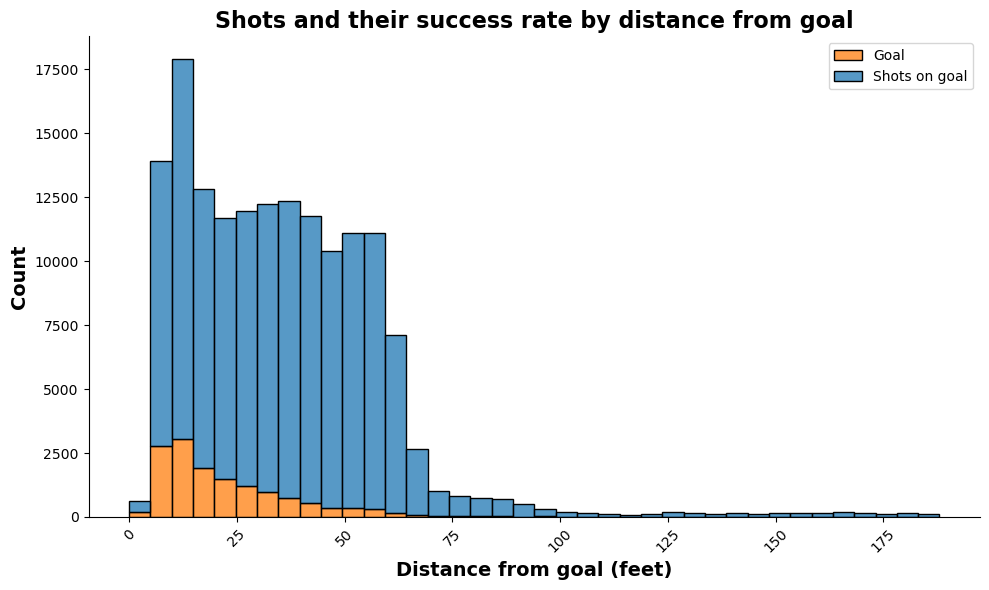

In [44]:
plt.figure(figsize=(10, 6))

plot = sns.histplot(data, x='goal_distance', hue='type_desc_key', multiple='stack', binwidth = 5)

# Format and aesthetics
sns.despine()
plot.grid(False)
plot.legend(labels = ["Goal","Shots on goal"])
title = 'Shots and their success rate by distance from goal'
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Distance from goal (feet)', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
print(str(data.is_goal))

0         False
1         False
2         False
3         False
4         False
          ...  
154261    False
154262    False
154263    False
154264    False
154265    False
Name: is_goal, Length: 154266, dtype: bool


# Histogram of shots and goals by angle (binned)

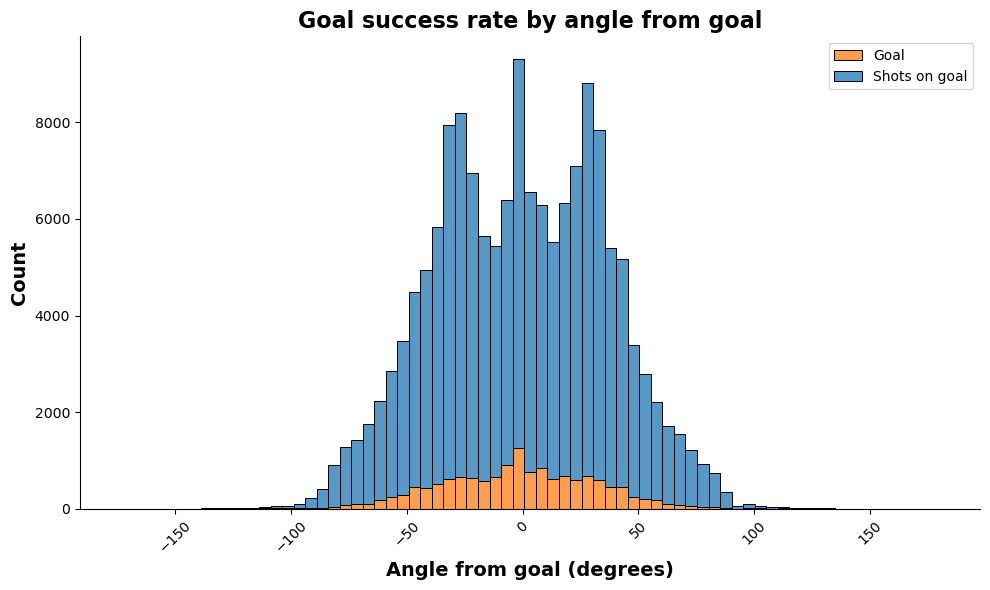

In [22]:
plt.figure(figsize=(10, 6))

plot = sns.histplot(data, x='goal_angle', hue='type_desc_key', multiple='stack', binwidth = 5)

# Format and aesthetics
sns.despine()
plot.grid(False)
plot.legend(labels = ["Goal","Shots on goal"])
title = 'Shots and their success rate by angle from goal'
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Angle from goal (degrees)', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Joint histograms of shots by distance and angle (binned)

<Figure size 1000x600 with 0 Axes>

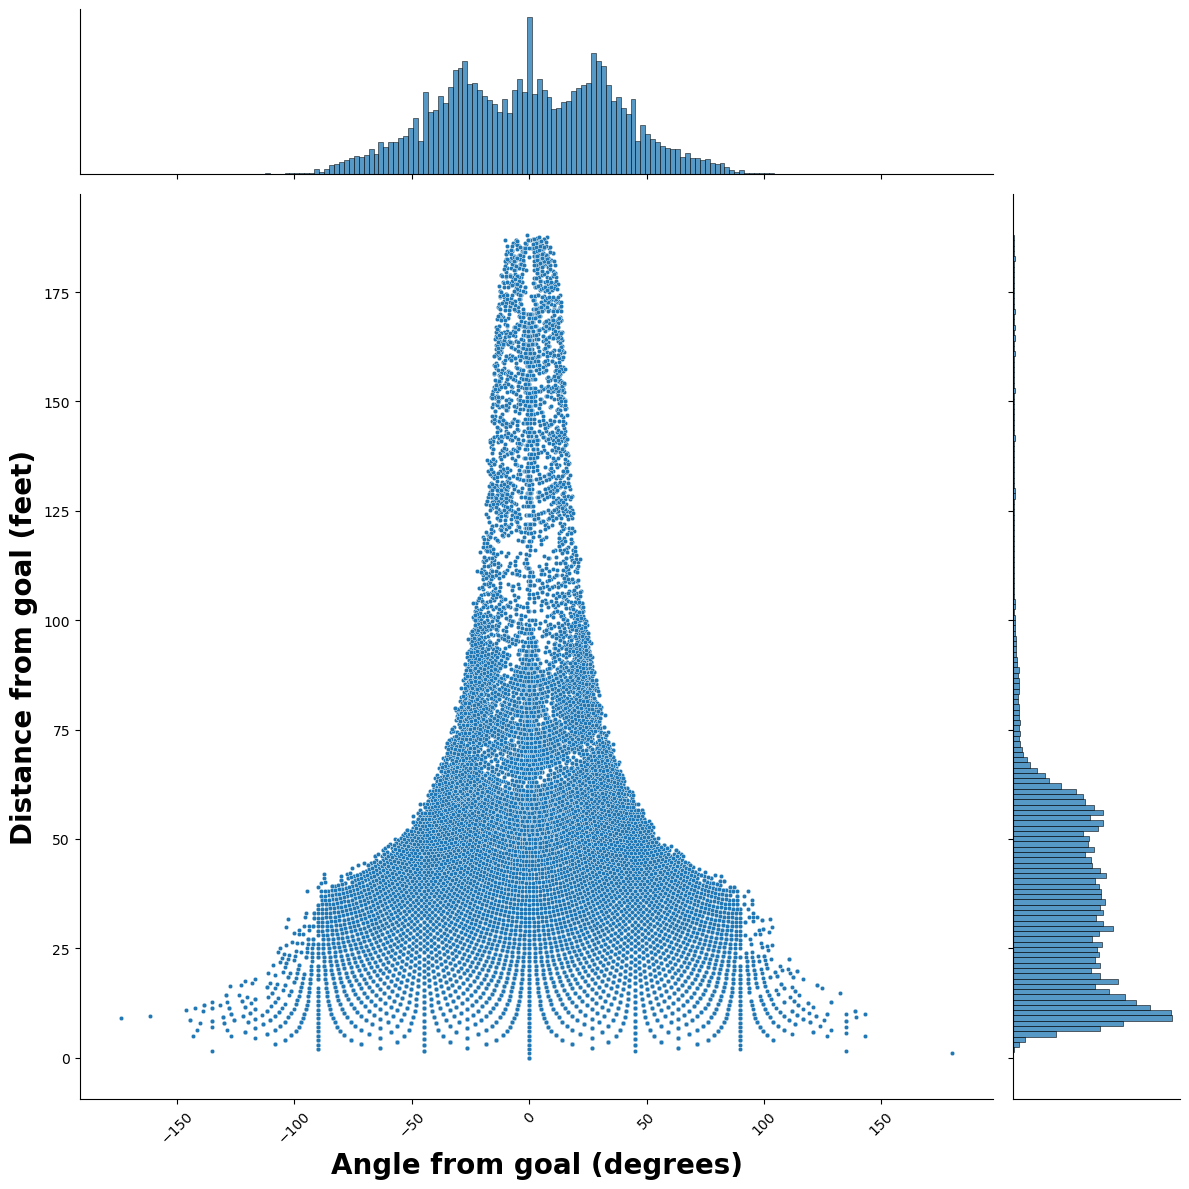

In [33]:
plt.figure(figsize=(10, 6))

plot = sns.jointplot(data, y="goal_distance", x="goal_angle", joint_kws={'s': 10},height=12)

# Format and aesthetics
sns.despine()
plt.xlabel('Angle from goal (degrees)', fontsize=20, fontweight='bold')
plt.ylabel('Distance from goal (feet)', fontsize=20, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Histogram of success rate by distance (binned)

/tmp/ipykernel_5303/262233442.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate_data = data.groupby('distance_bin').apply(
/tmp/ipykernel_5303/262233442.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  success_rate_data = data.groupby('distance_bin').apply(


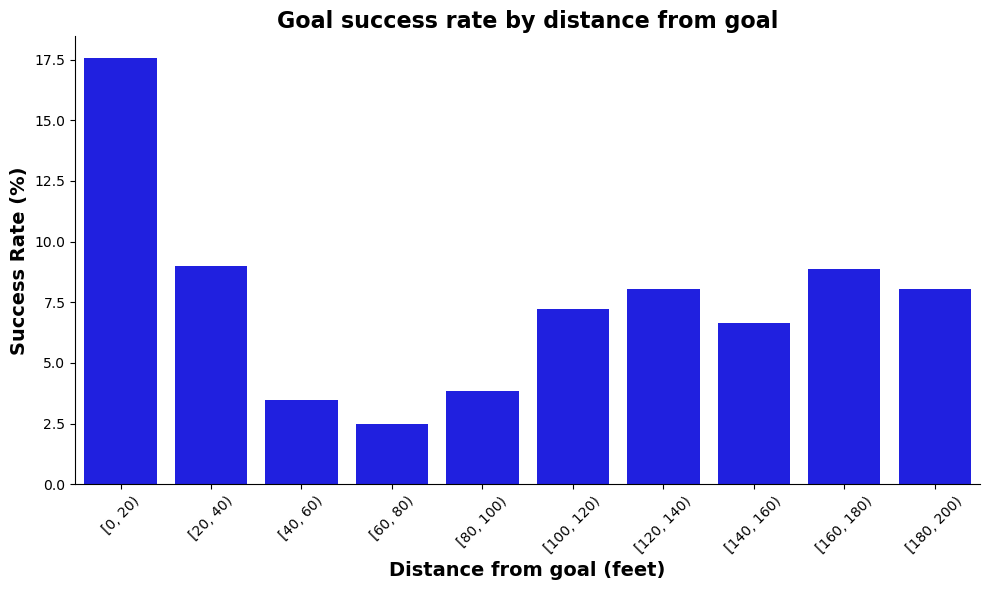

In [11]:
#Put 'goal_distance' into bins for plotting
bin_width = 20
bins = range(0, int(data['goal_distance'].max()) + bin_width, bin_width)
data['distance_bin'] = pd.cut(data['goal_distance'], bins=bins, right=False)

#Calculate the total number of shots and goals for each bin
success_rate_data = data.groupby('distance_bin').apply(
    lambda x: (x['type_desc_key'] == 'goal').sum()*100 / len(x)  #Calculating success rate (goals/total shots*100)
).reset_index(name='success_rate')

plt.figure(figsize=(10, 6))

#Plotting the success rate as a barplot
sns.barplot(x='distance_bin', y='success_rate', data=success_rate_data, color='blue')

#Format and aesthetics
sns.despine()
plt.grid(False)
title = 'Goal success rate by distance from goal'
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Distance from goal (feet)', fontsize=14, fontweight='bold')
plt.ylabel('Success Rate (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Histogram of success rate by angle from goal (binned)

/tmp/ipykernel_5303/2942888894.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate_data = data.groupby('angle_bin').apply(
/tmp/ipykernel_5303/2942888894.py:8: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: (x['type_desc_key'] == 'goal').sum()*100 / len(x)  #Calculating success rate (goals/total shots)*100
/tmp/ipykernel_5303/2942888894.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  success_rate_data = data.groupby('angle_bin').apply(


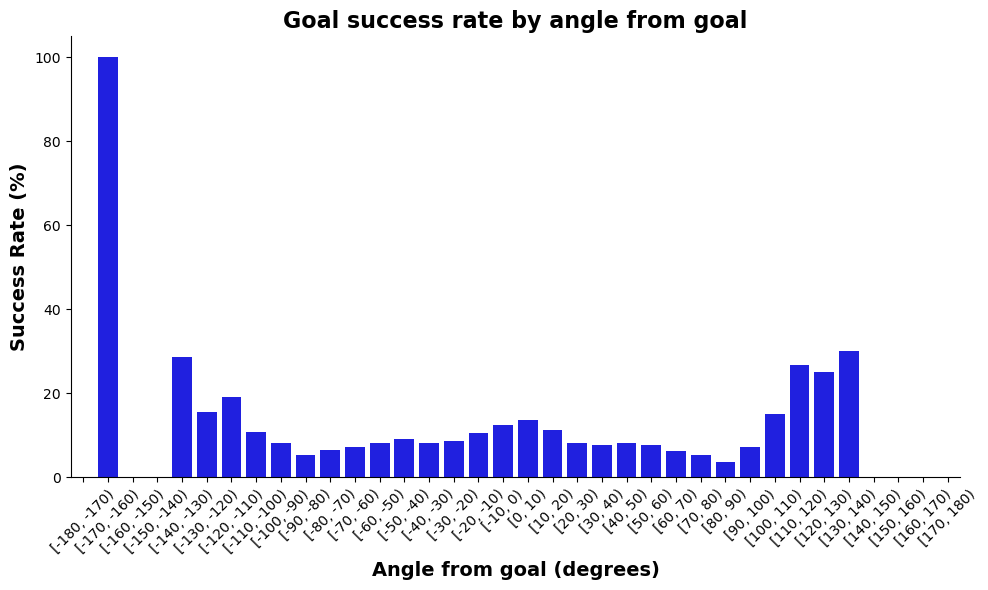

In [14]:
#Put 'goal_distance' into bins for plotting
bin_width = 10
bins = range(-180, 181, bin_width)  # Bins range from -90 to 90 with the specified bin width
data['angle_bin'] = pd.cut(data['goal_angle'], bins=bins, right=False)

#Calculate the total number of shots and goals for each bin
success_rate_data = data.groupby('angle_bin').apply(
    lambda x: (x['type_desc_key'] == 'goal').sum()*100 / len(x)  #Calculating success rate (goals/total shots)*100
).reset_index(name='success_rate')

plt.figure(figsize=(10, 6))

#Plotting the success rate as a barplot
sns.barplot(x='angle_bin', y='success_rate', data=success_rate_data, color='blue')

#Format and aesthetics
sns.despine()
plt.grid(False)
title = 'Goal success rate by angle from goal'
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Angle from goal (degrees)', fontsize=14, fontweight='bold')
plt.ylabel('Success Rate (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Histogram of success rate by distance from goal (binned) and if goal is empty or not

/tmp/ipykernel_5303/799093781.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate_data = data.groupby(['distance_bin', 'is_empty_net']).apply(
/tmp/ipykernel_5303/799093781.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  success_rate_data = data.groupby(['distance_bin', 'is_empty_net']).apply(


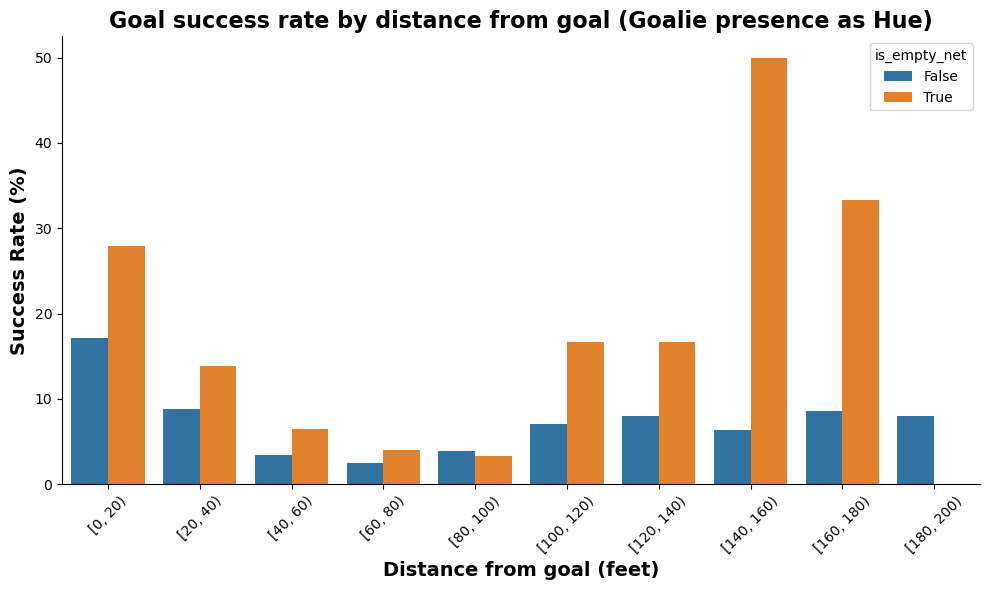

In [15]:
#Put 'goal_distance' into bins for plotting
bin_width = 20
bins = range(0, int(data['goal_distance'].max()) + bin_width, bin_width)
data['distance_bin'] = pd.cut(data['goal_distance'], bins=bins, right=False)

#Calculate the success rate for each bin, including the 'is_empty_net' hue
success_rate_data = data.groupby(['distance_bin', 'is_empty_net']).apply(
    lambda x: (x['type_desc_key'] == 'goal').sum() * 100 / len(x)  # Success rate: goals/total shots*100
).reset_index(name='success_rate')

#Plotting
plt.figure(figsize=(10, 6))

#Plotting the success rate as a barplot, adding 'goal_empty' as a hue
sns.barplot(x='distance_bin', y='success_rate', data=success_rate_data, hue='is_empty_net')

#Format and aesthetics
sns.despine()
plt.grid(False)
title = 'Goal success rate by distance from goal (Goalie presence as Hue)'
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Distance from goal (feet)', fontsize=14, fontweight='bold')
plt.ylabel('Success Rate (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()